/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if __name__ == '__main__':


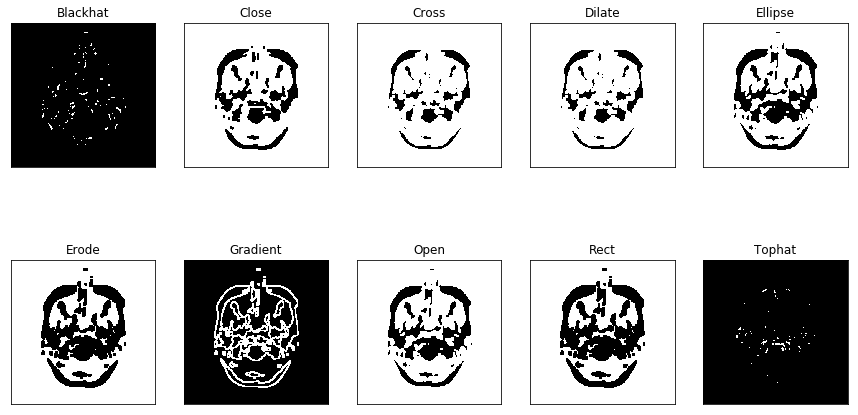

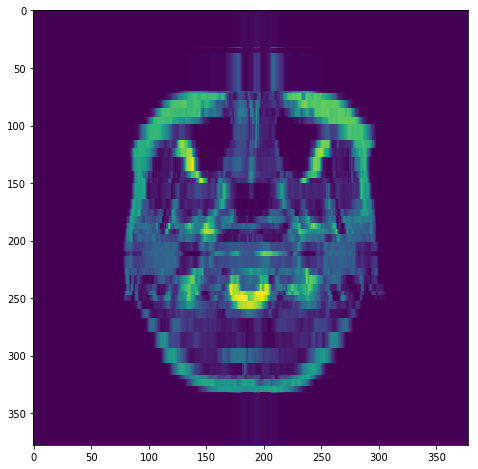

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn import cluster
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = ndimage.imread("i002.bmp", 0)
plt.figure(figsize = (15,8))
plt.imshow(image)


imgpath1 =  "i002.bmp"
#grayscaling the image
img = cv2.imread(imgpath1, 0)
#denoising the image
median = cv2.medianBlur(img, 5)
    
th = 0
max_val = 255
    
kernel = np.ones((5,5),np.uint8)
#thresholding the image-Otsu's thresholding
ret, o1 = cv2.threshold(median, th, max_val, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
ret, o2 = cv2.threshold(median, th, max_val, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )

gradient1 = cv2.morphologyEx(o2, cv2.MORPH_BLACKHAT, kernel)
gradient2 = cv2.morphologyEx(o2, cv2.MORPH_CLOSE, kernel)
gradient3 = cv2.morphologyEx(o2, cv2.MORPH_CROSS, kernel)
gradient4 = cv2.morphologyEx(o2, cv2.MORPH_DILATE, kernel)
gradient5 = cv2.morphologyEx(o2, cv2.MORPH_ELLIPSE, kernel)
gradient6 = cv2.morphologyEx(o2, cv2.MORPH_ERODE, kernel)
gradient7 = cv2.morphologyEx(o2, cv2.MORPH_GRADIENT, kernel)
gradient8 = cv2.morphologyEx(o2, cv2.MORPH_OPEN, kernel)
gradient9 = cv2.morphologyEx(o2, cv2.MORPH_RECT, kernel)
gradient0 = cv2.morphologyEx(o2, cv2.MORPH_TOPHAT, kernel)
    
output = [gradient1, gradient2, gradient3, gradient4, gradient5, gradient6, gradient7, gradient8, gradient9, gradient0]
  
titles = ['Blackhat', 'Close', 'Cross', 'Dilate', 'Ellipse', 'Erode', 'Gradient', 'Open', 'Rect', 'Tophat']
    
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(output[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show() 

#clustering the image
kmeans_cluster = cluster.KMeans(n_clusters=35)
kmeans_cluster.fit(image)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_
plt.figure(figsize = (15,8))
plt.imshow(cluster_centers[cluster_labels])